In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import MultipleLocator
import matplotlib.dates as mdates

In [3]:
oni = pd.read_excel("ONI.xlsx",header=None)[:]#读取
oni_pd = oni
oni = oni.to_numpy().flatten()
oni.shape


(73,)

In [4]:
gmst = pd.read_csv("avarangeof6.csv",header=0,index_col=0)
gmst = gmst["1950":"2023"]
oni_pd.index = gmst.index
gmst = gmst['0'].to_numpy().flatten()
gmst.shape

(73,)

## 拟合 $ y = ax+b $

In [5]:
coff_x = np.polyfit(oni,gmst,1)

### 再对gmst拟合

In [6]:
coff_gmst  = np.polyfit(np.arange(len(gmst)),gmst,1)

In [7]:
gmst_hat = np.poly1d(coff_x)
gmst_hat_self = np.poly1d(coff_gmst)
gmst_self_ll = gmst_hat_self(np.arange(len(gmst)))
gmst_pre = gmst_hat(oni_pd)
gmst_pre = gmst_pre.flatten()
gmst_self = gmst - gmst_self_ll
gmst_pre.shape

(73,)

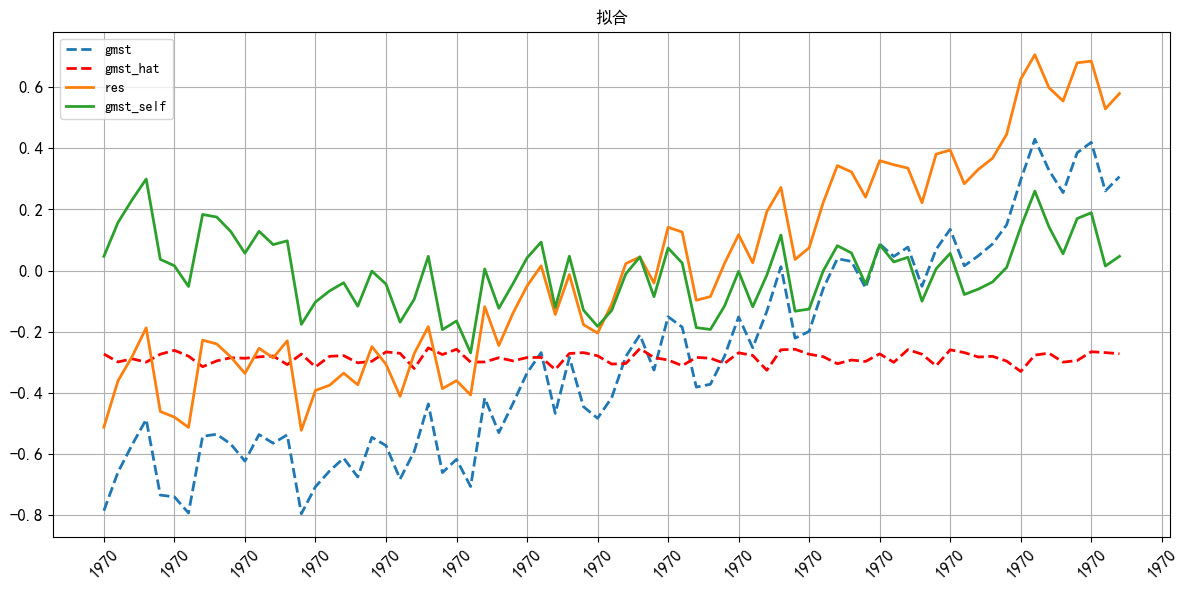

In [8]:
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False
fig,ax = plt.subplots(1,1,figsize=(12
                    ,6))
ax.plot(oni_pd.index,gmst, "--",lw = 2.0,label = 'gmst')
#ax.plot(oni_pd.index,oni_pd, "--",lw = 2.0,label = 'ONI')
ax.plot(oni_pd.index,gmst_pre,'r--',lw = 2.0,label = 'gmst_hat')
res= gmst-gmst_pre
ax.plot(oni_pd.index,res,'-',lw = 2.0,label = 'res')
ax.plot(oni_pd.index,gmst_self,'-',lw = 2.0,label = 'gmst_self')
ax.legend(loc = "best")
ax.tick_params(axis='both', which='major', labelsize=12)
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.tick_params(axis='x', rotation=45)
ax.set_title("拟合")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.tight_layout()
plt.grid()
plt.show()

## 相关系数

In [9]:

y_cor= np.corrcoef(oni[:-1],gmst_self[1:])

In [10]:
y_cor

array([[1.        , 0.43568211],
       [0.43568211, 1.        ]])

## 计算 $\hat{y}-y$

In [11]:
res = gmst[1:] - gmst_hat(oni)[:-1]

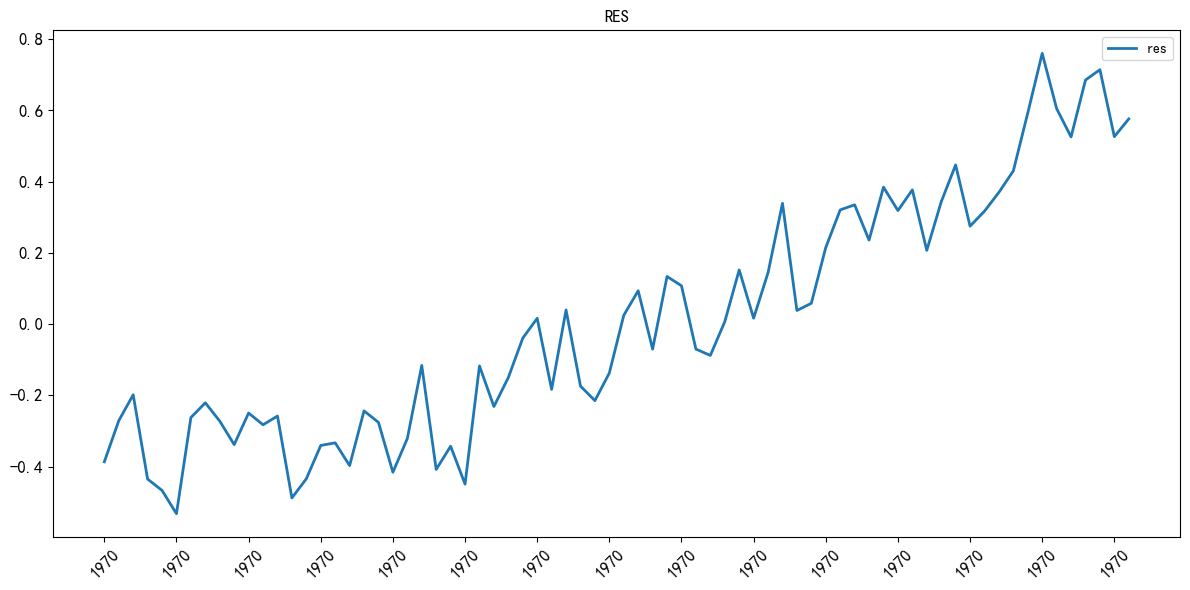

In [12]:
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False
fig,ax = plt.subplots(1,1,figsize=(12
                    ,6))
# ax.plot(oni_pd.index,gmst, "--",lw = 2.0,label = 'gmst')
# ax.plot(oni_pd.index,oni_pd, "--",lw = 2.0,label = 'ONI')
# ax.plot(oni_pd.index,gmst_pre,'r--',lw = 2.0,label = 'gmst_hat')
# res= gmst-gmst_pre
ax.plot(oni_pd.index[1:],res,'-',lw = 2.0,label = 'res')
ax.legend(loc = "best")
ax.tick_params(axis='both', which='major', labelsize=12)
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.tick_params(axis='x', rotation=45)
ax.set_title("RES")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.tight_layout()
plt.show()